# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve
from sklearn.pipeline import Pipeline


# Organizing Data

In [2]:
# global Variables
random_state = 3 # random_state variable is chosen to be 3 for all algorithms to ensure fair comparison

In [3]:
df = pd.read_csv('data.csv',index_col=0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
#splitting the data into features and labels
X = df.drop(['result'],axis=1)
y = df['result']

# spliting the date 0.9 for cross validation (simply train & test) and training 
# and 0.1 as a holdout testing set to test the model at the end (validation)
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [5]:
# pipelining both standardScalar and KNN model
scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

# Finding optimal K using GridSearchCV

In [6]:
k_values = list(range(1,30))
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [7]:
# Find the best K regarding accuracy score
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [8]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.92397849, 0.92012407, 0.9201158 , 0.90466501, 0.91238213,
       0.90208437, 0.91109181, 0.90722911, 0.91495451, 0.90853598,
       0.913689  , 0.89949545, 0.90465674, 0.89822167, 0.90208437,
       0.89693962, 0.90208437, 0.89692308, 0.89692308, 0.89047146,
       0.89176179, 0.88918114, 0.88917287, 0.88789909, 0.88789909,
       0.8827378 , 0.88789082, 0.87886683, 0.88143921])

Text(0, 0.5, 'Accuracy')

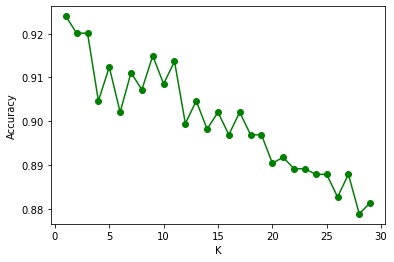

In [9]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'og-')
plt.xlabel("K")
plt.ylabel("Accuracy")


# Validating the model

In [10]:
pred = full_cv_classifier.predict(X_test)
confusion_matrix(y_test,pred)

array([[77,  2],
       [ 2,  6]], dtype=int64)

In [11]:
accuracy_score(y_test,pred)

0.9540229885057471

# Model Performance

In [12]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        79
           1       0.75      0.75      0.75         8

    accuracy                           0.95        87
   macro avg       0.86      0.86      0.86        87
weighted avg       0.95      0.95      0.95        87



In [13]:
# remaining ROC/AUC curve
roc_curve(y_test, pred)

(array([0.        , 0.02531646, 1.        ]),
 array([0.  , 0.75, 1.  ]),
 array([2, 1, 0], dtype=int64))